In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

C:\Users\INDRAJEET YADAV\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# import IRIS datasets from python library 

In [2]:
from sklearn.datasets import load_iris

In [6]:
iris=load_iris()

# Remeber whever we load datasets from python library, it will always be in Array form Hence need to convert this array to dataframe

In [14]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [17]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
df['flower']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns',inplace=True)

In [23]:
df.head(3)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


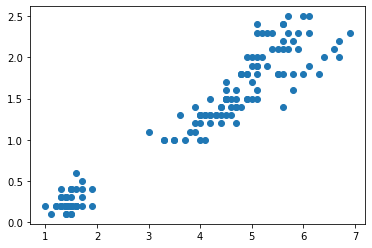

In [26]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

# it seems there are 3 cluster hence lets take random 3

In [28]:
km=KMeans(n_clusters=3)

In [29]:
y_predict=km.fit_predict(df)

In [34]:
y_predict # so 3 cluster has been predicted 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [39]:
#getting center value for each clusters
km.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

# Lets add this cluster in dataset

In [35]:
df['cluster']=y_predict

In [36]:
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


# now lets separate each cluster and plot it

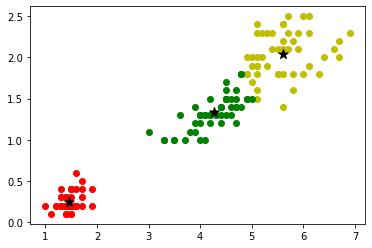

In [46]:
#separate each cluster
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]

#Plot all the cluster 
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],c='r')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],c='y')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],c='g')

#lets assign center value
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='black',s=100,marker='*')

# Now lets try to find out k vlaue from EBLOW method to find out best k value and assign them

In [53]:
error=[]
k_range=range(1,10)

for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df)
    error.append(km.inertia_)

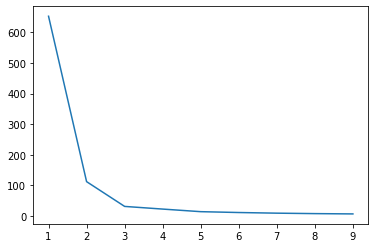

In [60]:
#lets plot error rate and get best K value

plt.plot(k_range,error)

# again Best K value is 3 hence our earlier model is correct 